In [36]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/homebrew/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['axis', 'figure']
`%matplotlib` prevents importing * from pylab and numpy



In [37]:
# load the data
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# EDA

In [38]:
# Apply pie chart to show feature distrubution
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex","Race",'PhysicalActivity','Diabetic','GenHealth','Asthma','KidneyDisease','SkinCancer'
                                    ),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

### Analysis on Numerical Features

In [39]:
df_numerical = df._get_numeric_data()
df_numerical.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x280350550>,
 'caps': [<matplotlib.lines.Line2D at 0x280350af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x280350280>,
 'medians': [<matplotlib.lines.Line2D at 0x2804140d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x280414670>,
 'means': [<matplotlib.lines.Line2D at 0x2804143a0>,
  <matplotlib.lines.Line2D at 0x280438820>]}

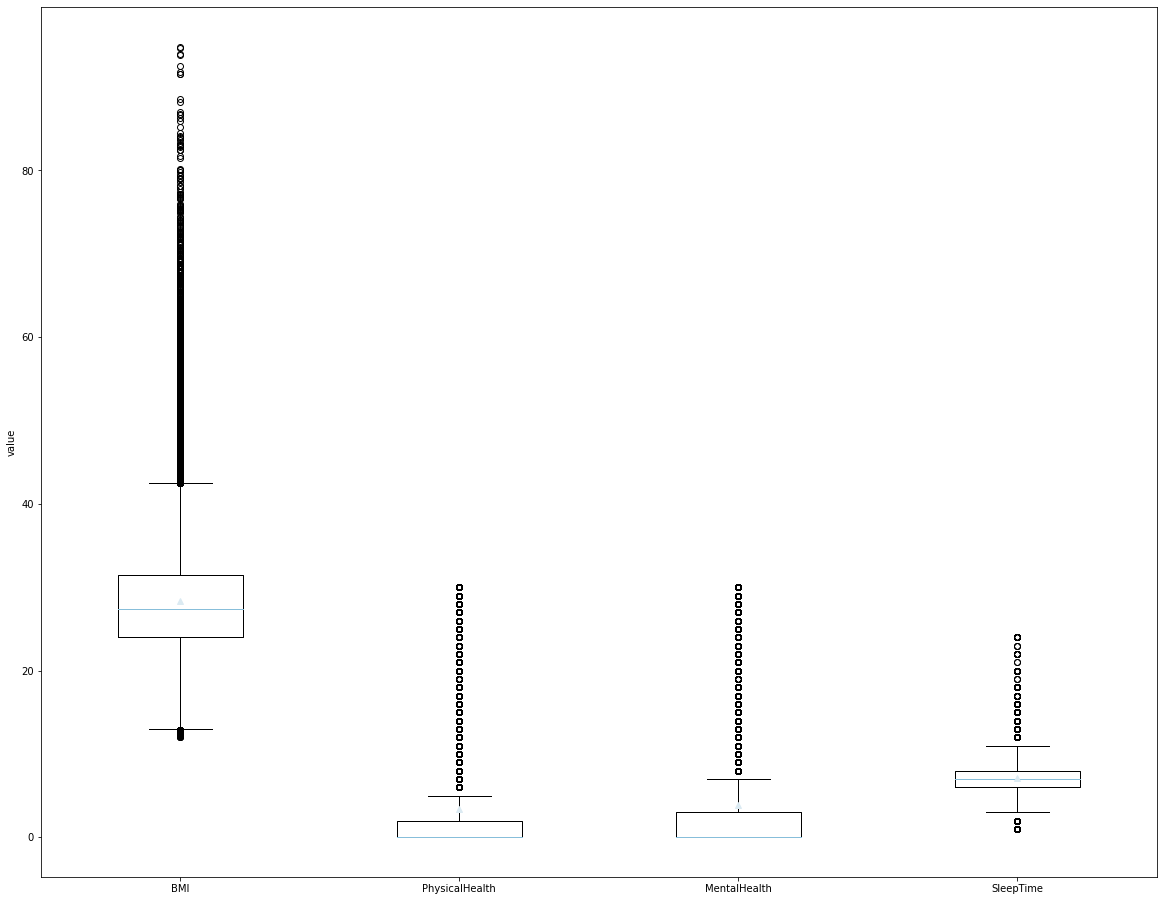

In [40]:
plt.figure(figsize=(20, 16))
values = []
for col in df_numerical.columns:
    values.append(df_numerical[col])
plt.ylabel('value')
plt.boxplot(values, showmeans=True, labels=df_numerical.columns)

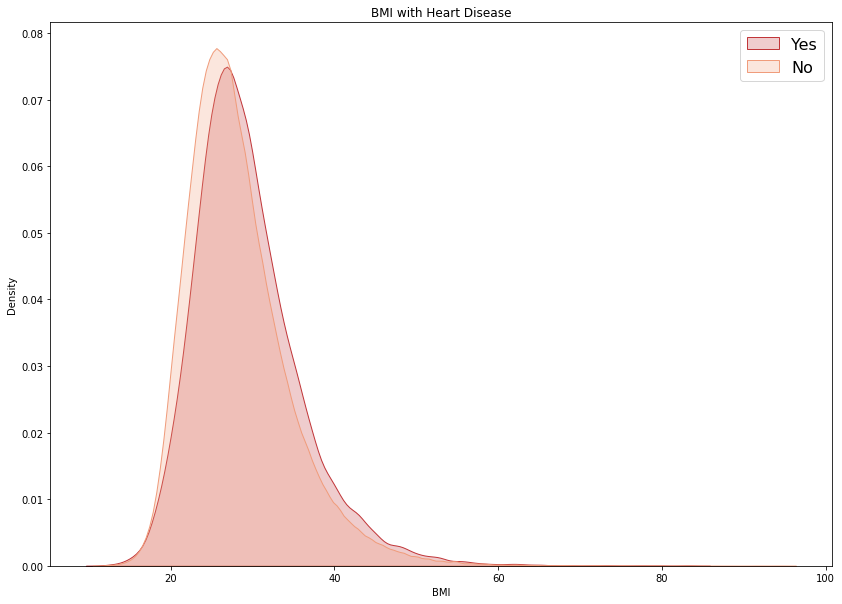

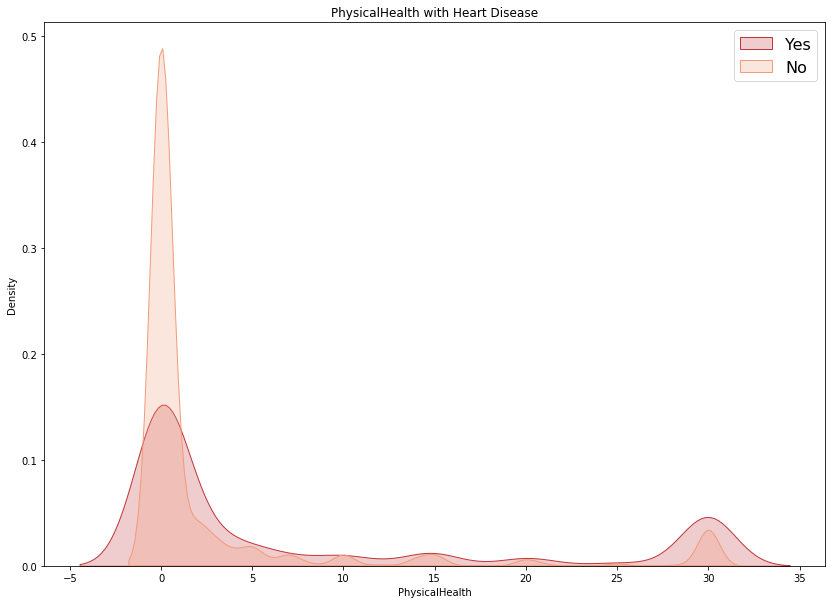

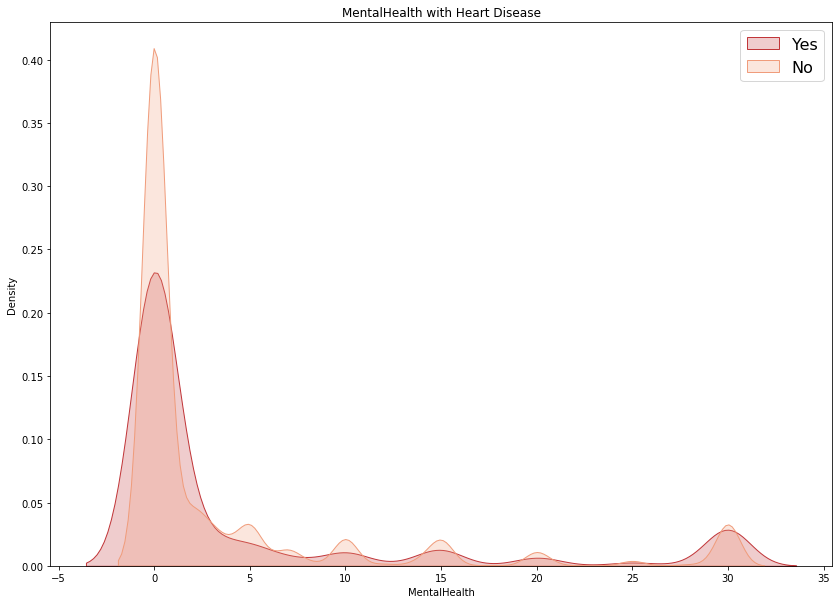

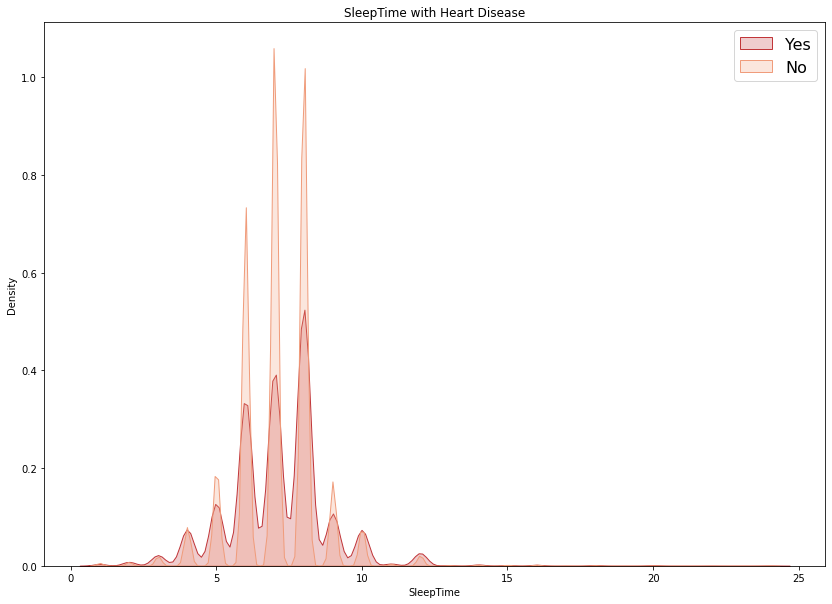

In [41]:
# kde plot for each (numerical feature, heartDisease) pair
cs = sns.color_palette("RdGy")
sns.set_palette(cs)

for numerical_feature in df_numerical.columns:
    fig, ax = plt.subplots(figsize = (14,10))
    sns.kdeplot(df.loc[(df['HeartDisease']=='Yes'), numerical_feature], shade=True, label='Yes')
    sns.kdeplot(df.loc[(df['HeartDisease']=='No'), numerical_feature], shade=True, label='No')
    plt.legend(fontsize=16)
    plt.title(f"{numerical_feature} with Heart Disease")

/var/folders/pn/5wswflg13r36tdylvd097kc40000gn/T/ipykernel_96649/1223250480.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Triangle Correlation Heatmap')

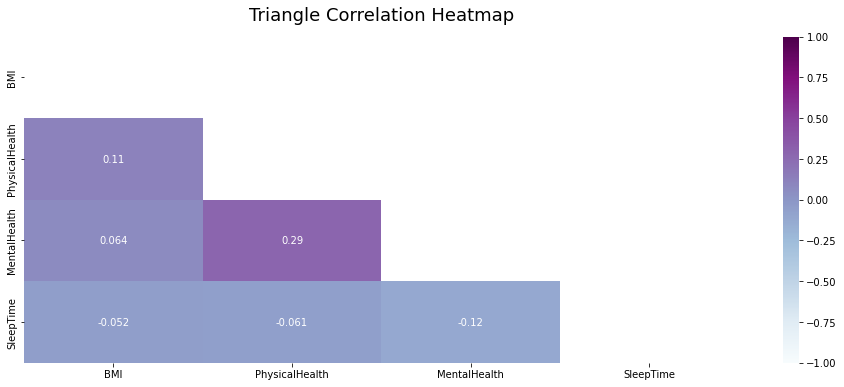

In [42]:
# Correlation among numerical features
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_numerical.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_numerical.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Analysis on Nomial Features

In [43]:
df_nomial = df.drop(df_numerical.columns, inplace=False, axis=1)
df_nomial.drop(['HeartDisease'], inplace=True, axis=1)
df_nomial.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


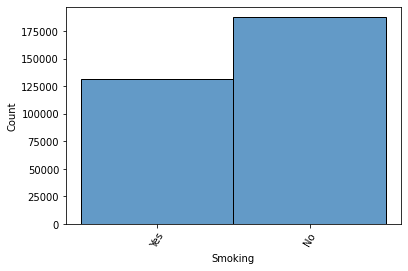

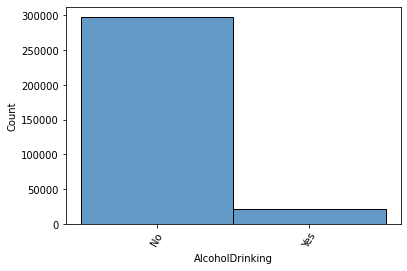

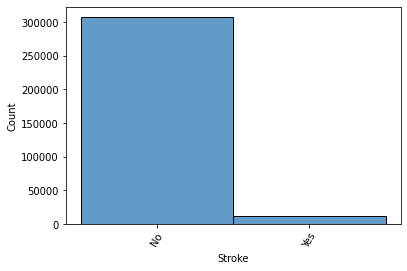

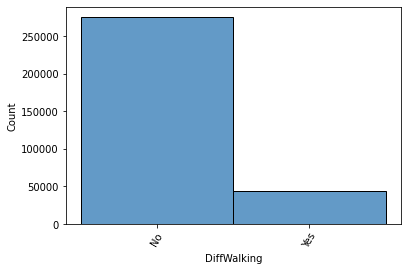

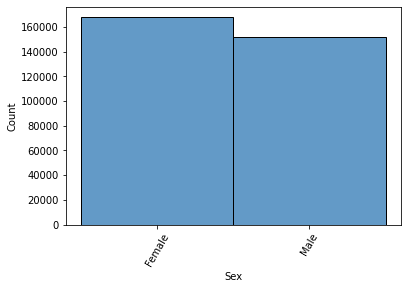

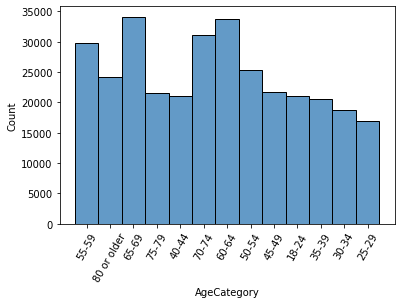

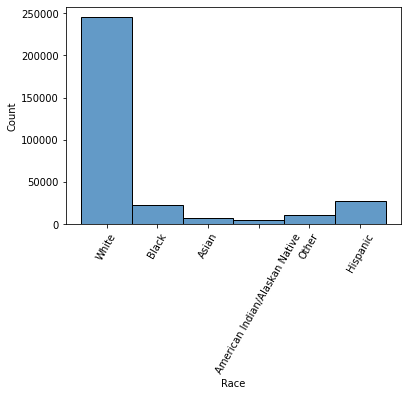

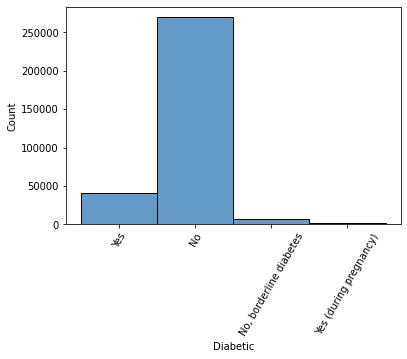

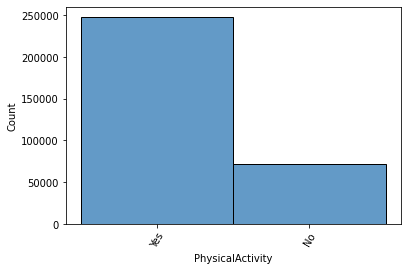

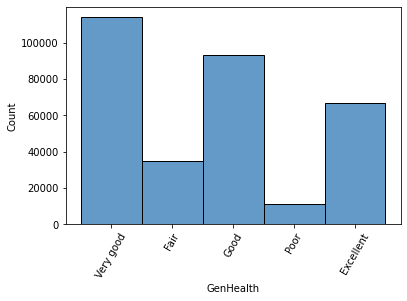

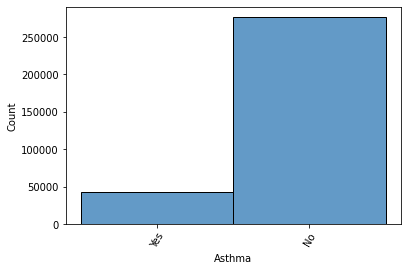

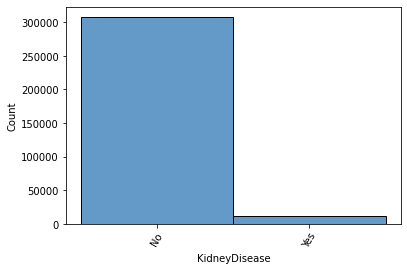

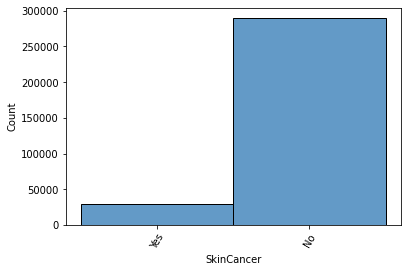

In [44]:
cs = sns.color_palette("RdBu_r")
sns.set_palette(cs)
for col in df_nomial.columns:
    sns.histplot(df_nomial[col])
    plt.xticks(rotation=60)
    plt.show()

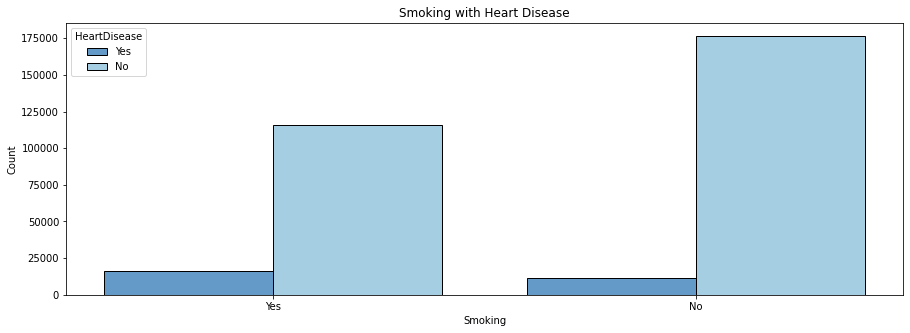

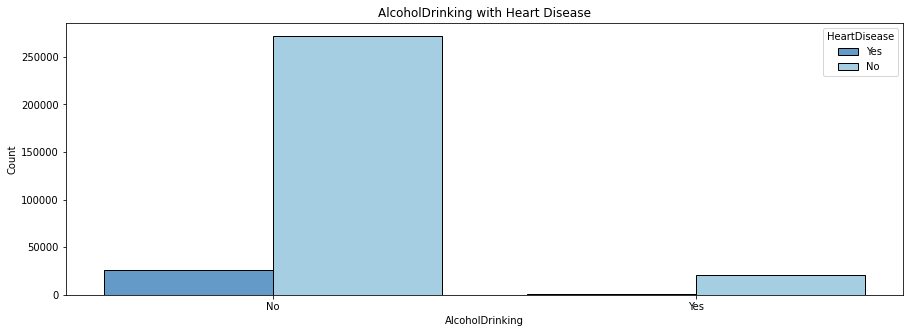

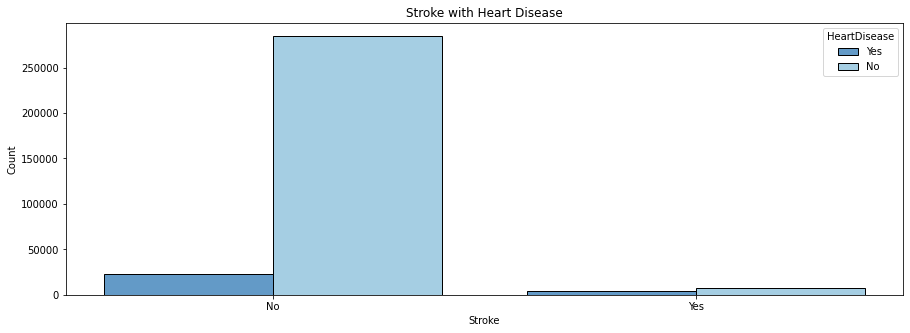

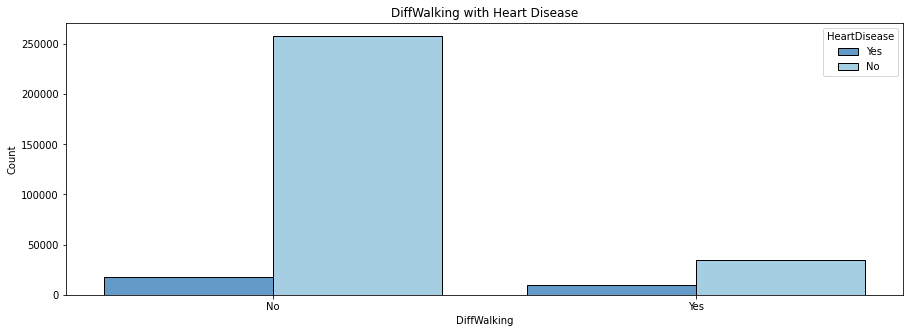

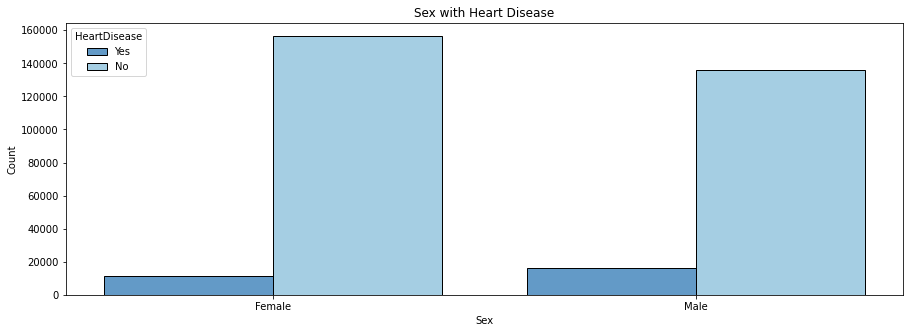

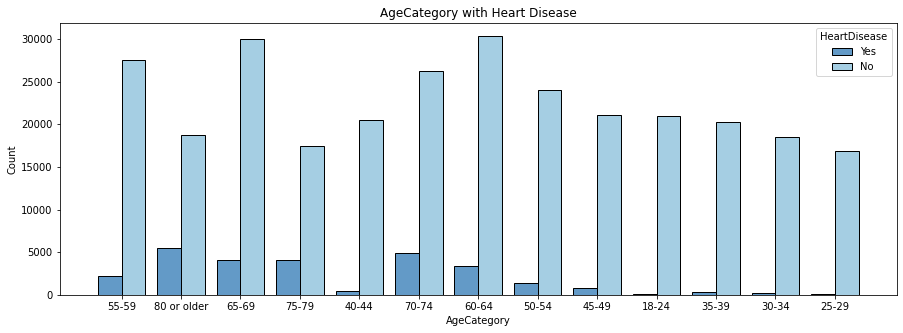

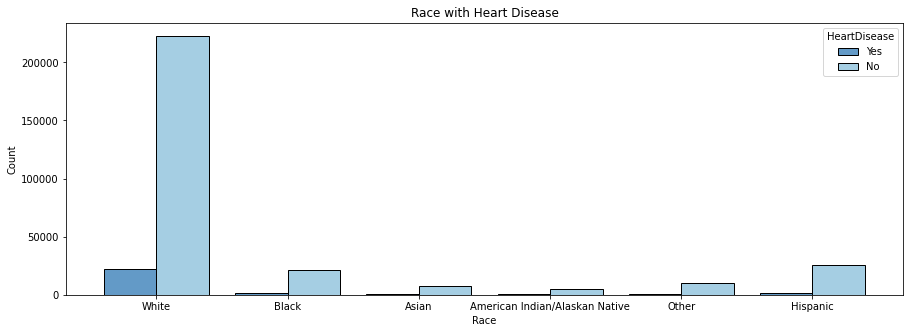

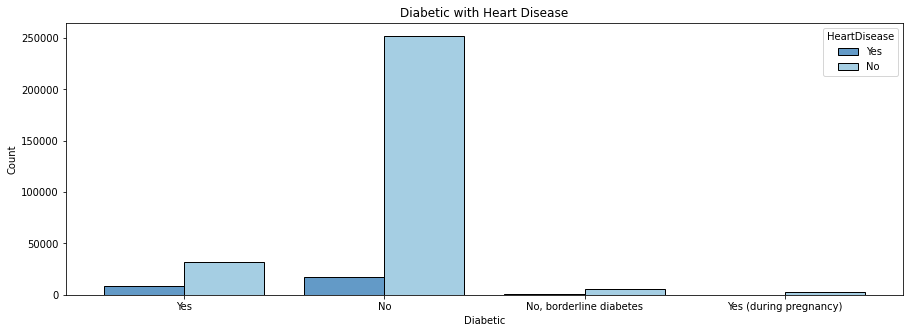

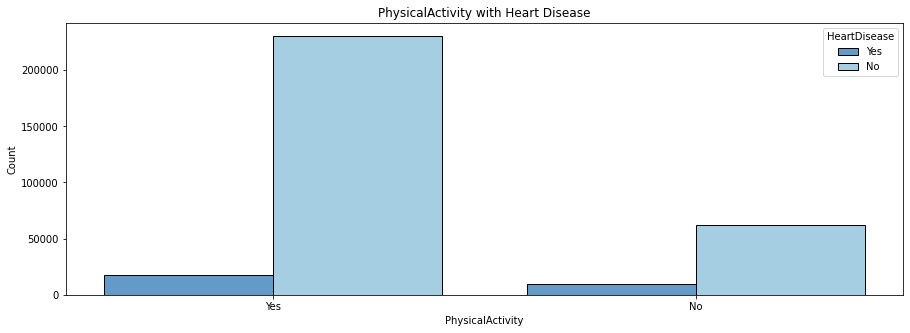

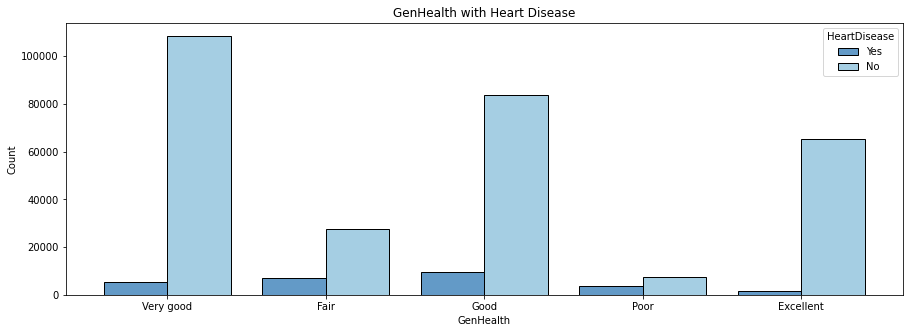

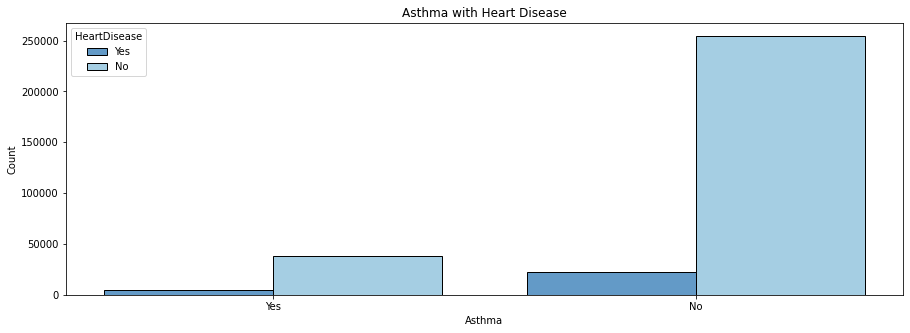

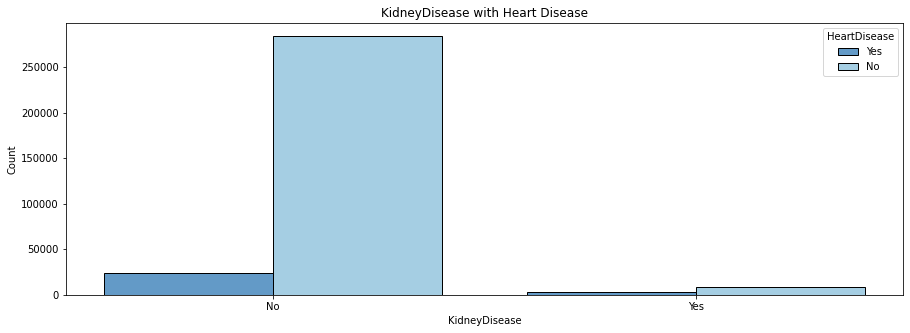

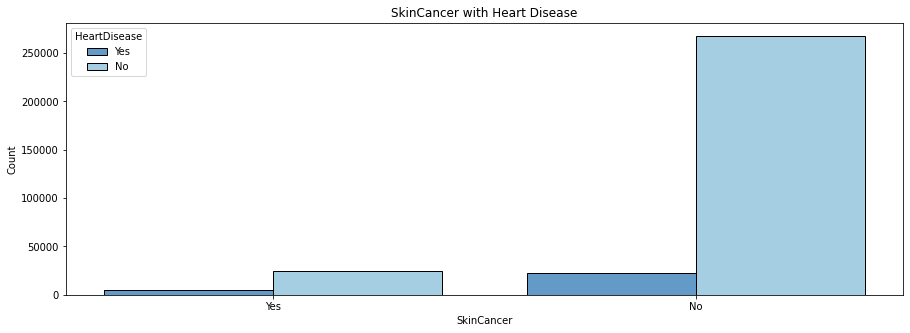

In [45]:
for col in df_nomial.columns:   
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.histplot(data=df, x=col, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
    plt.title(f'{col} with Heart Disease')
    plt.show()

In [46]:
# Correlation
def encoding(v):
    if v.eq("Yes"):
        return 1
    return 0
df_nomial_corr = df_nomial.drop(['Sex', 'AgeCategory', 'GenHealth', 'Race'], axis=1, inplace=False)
# for col in df_nomial_corr.columns:
#     df_nomial_corr[col].apply(encoding)
# df_nomial_corr.head()
for col in df_nomial_corr.columns:
    df_nomial_corr[col] = df_nomial_corr[col].map({'Yes': 1, 'No': 0})
df_nomial_corr.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1.0,1,1,0,1
1,0,0,1,0,0.0,1,0,0,0
2,1,0,0,0,1.0,1,1,0,0
3,0,0,0,0,0.0,0,0,0,1
4,0,0,0,1,0.0,1,0,0,0


/var/folders/pn/5wswflg13r36tdylvd097kc40000gn/T/ipykernel_96649/152322307.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Triangle Correlation Heatmap')

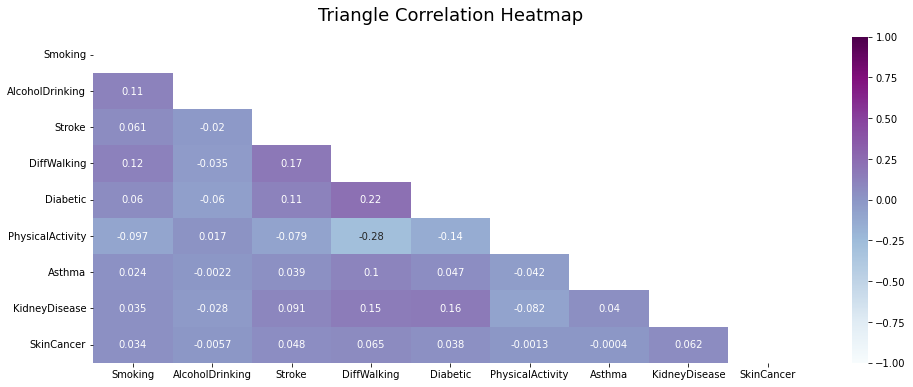

In [47]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_nomial_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_nomial_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Preprocessing

In [48]:
# check NaN value
df.isnull().sum().sum()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [50]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [51]:
# standarize the numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,55-59,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,80 or older,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,65-69,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,75-79,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,40-44,White,No,Yes,Very good,0.628776,No,No,No


In [52]:
# split our target column from feature columns
y = pd.DataFrame(df['HeartDisease'])
X = df.drop(['HeartDisease'], axis=1, inplace=False)

In [53]:
# Encoding nomial features
X = pd.get_dummies(X)
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,-1.844750,-0.046751,3.281069,-1.460354,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,-1.256338,-0.424070,-0.490039,-0.067601,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
2,-0.274603,2.091388,3.281069,0.628776,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
3,-0.647473,-0.424070,-0.490039,-0.763977,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,-0.726138,3.097572,-0.490039,0.628776,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   Smoking_No                           319795 non-null  uint8  
 5   Smoking_Yes                          319795 non-null  uint8  
 6   AlcoholDrinking_No                   319795 non-null  uint8  
 7   AlcoholDrinking_Yes                  319795 non-null  uint8  
 8   Stroke_No                            319795 non-null  uint8  
 9   Stroke_Yes                           319795 non-null  uint8  
 10  DiffWalking_No                       319795 non-null  uint8  
 11  DiffWalking_Y

In [55]:
# Check the distribution of target classes
from collections import Counter
c = Counter(y)
c

Counter({'HeartDisease': 1})

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

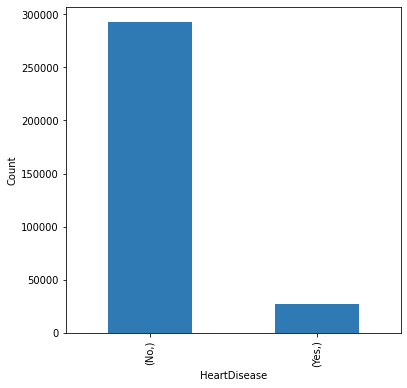

In [56]:
# Virtualize the target distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.xlabel("HeartDisease")
plt.ylabel("Count")
y.value_counts().plot(kind='bar')

In [57]:
# Convert yes/no in "HeartDisease" (our target) to be 1/0
print(type(y))
y.loc[y.HeartDisease == 'No', 'HeartDisease'] = 0
y.loc[y.HeartDisease == 'Yes', 'HeartDisease'] = 1
y['HeartDisease'] = y.HeartDisease.astype(uint8)
y.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   HeartDisease  319795 non-null  uint8
dtypes: uint8(1)
memory usage: 312.4 KB


In [58]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE(random_state=42)
X_oversampled, y_oversampled = oversample.fit_resample(X.to_numpy(), y.to_numpy())

In [59]:
counter = Counter(y_oversampled)
print(counter)

Counter({0: 292422, 1: 292422})


(array([292422.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 292422.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

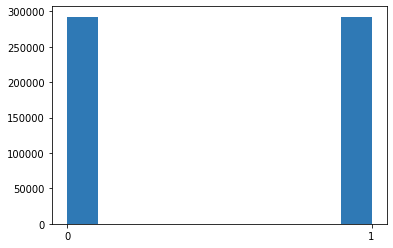

In [60]:
# virtualize the new distribution of y after oversampling
plt.xticks([0, 1])
plt.hist(y_oversampled)

In [61]:
# Split the dataset into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, shuffle = True, test_size = 0.2)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (467875, 50)
Shape of testing feature: (116969, 50)
Shape of training label: (467875,)
Shape of training label: (116969,)


In [62]:
# check for outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
# print(yhat)
# print(X_train[mask])
X_train, y_train = X_train[mask], y_train[mask]
print('Shape of training feature:', X_train.shape)
print('Shape of training label:', y_train.shape)

Shape of training feature: (421087, 50)
Shape of training label: (421087,)


# Model Training

### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [64]:
def plot_conf_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
    sns.heatmap(conf_matrix, annot=True)

accuracy_score:0.7593977891578111
recall_score:0.9008325087856972
f1_score:0.7895897662108514


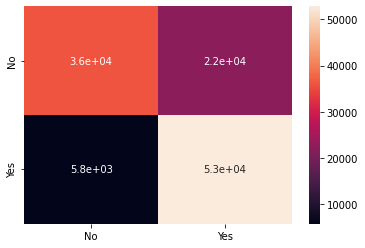

In [65]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'recall_score:{recall_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

### Neural Network

In [66]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import RMSprop
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

In [67]:
# # import tensorflow as tf
# # define a neural network
# def Net():
#     model = Sequential()
#     model.add(Dense(input_dim=50, activation="relu", units=18))
#     model.add(Dense(kernel_initializer="normal", activation="relu", units=12))
#     model.add(Dense(kernel_initializer="normal", units=1))
#     model.compile(loss="mean_squared_error", optimizer="adam")
#     return model

In [68]:
# estimator = KerasRegressor(build_fn=Net, epochs=10, batch_size=5)
# estimator.fit(X_train, y_train)

In [69]:
# y_pred_2 = estimator.predict(X_test)
# y_pred_2 = y_pred_2>0.5

# plot_conf_matrix(y_test, y_pred_2)
# print(f'accuracy_score:{accuracy_score(y_test, y_pred_2)}')  
# print(f'recall_score:{recall_score(y_test, y_pred_2)}')  
# print(f'f1_score:{f1_score(y_test, y_pred_2)}')

### SGD

In [71]:
# SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

accuracy_score:0.8042130820986757
recall_score:0.8597188576887645
f1_score:0.8148531421041143


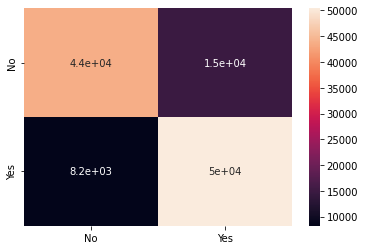

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')
print(f'recall_score:{recall_score(y_test, y_pred)}')
print(f'f1_score:{f1_score(y_test, y_pred)}')

### Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9280407629371885

In [75]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9218840629158279

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58351
           1       0.93      0.92      0.93     58618

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969



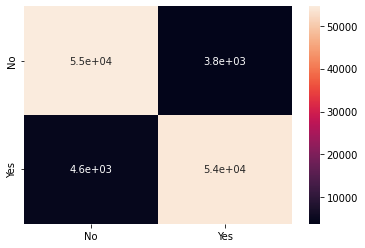

In [93]:
 # making confusion matrix 
plot_conf_matrix(y_test, y_pred)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58351
           1       0.93      0.92      0.93     58618

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969



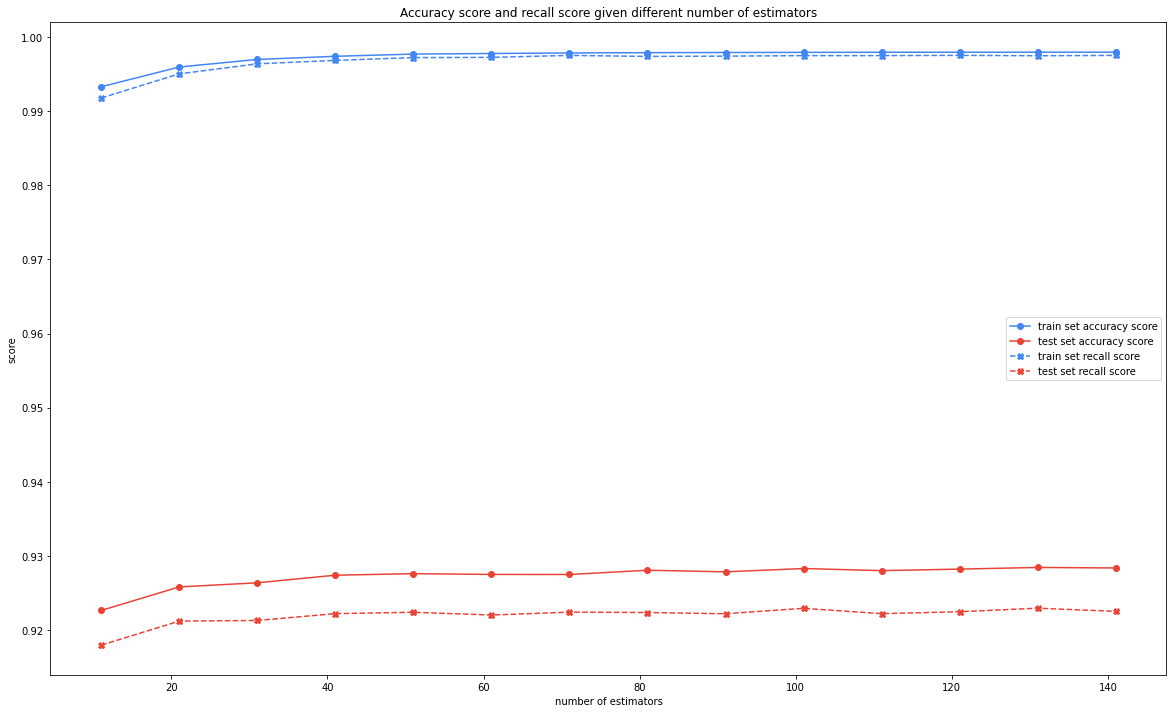

[11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141]
[0.9226718190289734, 0.9258435995862152, 0.9263993023792629, 0.9274252152279664, 0.9276303977977071, 0.9275278065128367, 0.9275192572390976, 0.9280920585796236, 0.9278783267361438, 0.9283228889705819, 0.9280407629371885, 0.9282459455069292, 0.9284682266241483, 0.9283998324342347]
[0.9932697993526278, 0.9959343318601619, 0.9969531237012779, 0.997378214003282, 0.9976774395789944, 0.9977558081821571, 0.997829427173007, 0.9978674240715102, 0.9978911721330747, 0.9979101705823262, 0.9979267942254213, 0.9979267942254213, 0.9979339186438907, 0.9979410430623601]


In [79]:
# How n_estimators (The number of trees in the forest) affect the model
from sklearn.metrics import recall_score
test_accuracy_score = []
train_accuracy_score = []

test_recall_score = []
train_recall_score = []

n_estimators = [i for i in range(11, 150, 10)]
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(n_estimators, train_accuracy_score, color="#4285f4", marker='o', label='train set accuracy score')
plt.plot(n_estimators, test_accuracy_score, color="#ea4335", marker='o', label='test set accuracy score')

plt.plot(n_estimators, train_recall_score, color="#4285f4", marker='X', label='train set recall score', linestyle='--')
plt.plot(n_estimators, test_recall_score, color="#ea4335", marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different number of estimators')
plt.xlabel('number of estimators')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(n_estimators)
print(test_accuracy_score)
print(train_accuracy_score)


In [80]:
# print(classification_report(y_test, y_))

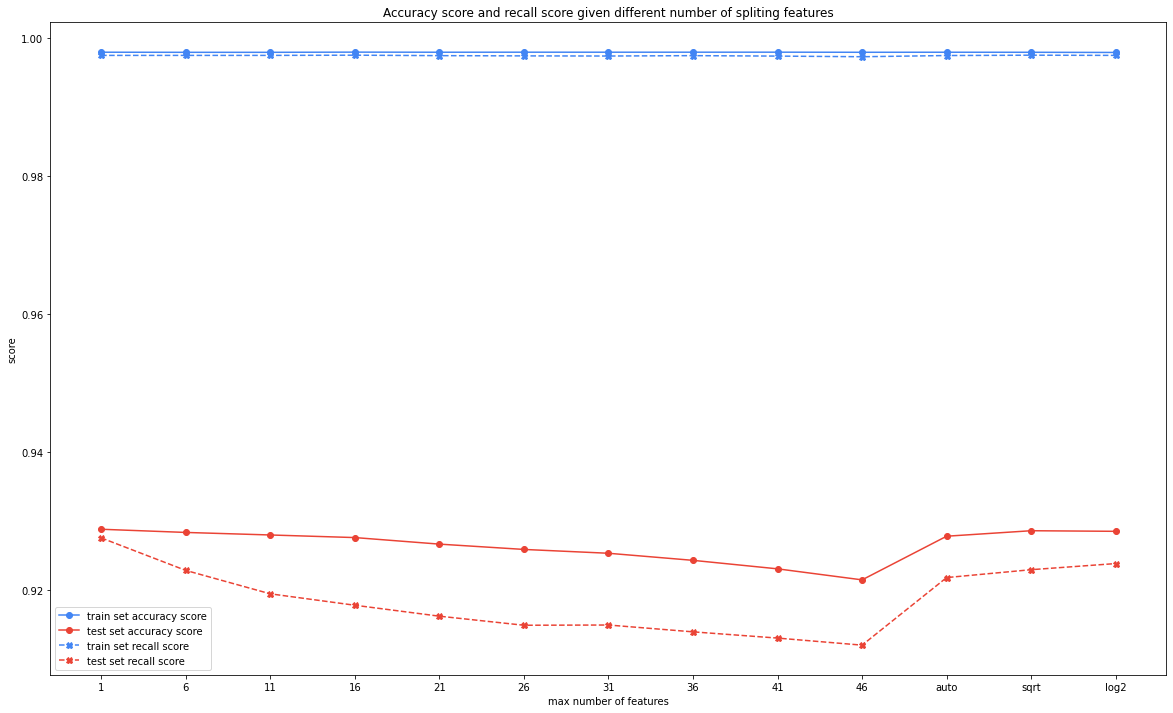

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 'auto', 'sqrt', 'log2']
[0.9287845497524986, 0.9283228889705819, 0.9279552701997965, 0.927579102155272, 0.9266301327702212, 0.9258606981336935, 0.9253049953406458, 0.9242790824919423, 0.9230479870734981, 0.9214492728842685, 0.9277757354512735, 0.9285708179090186, 0.9284853251716266]
[0.9979149201946391, 0.9979006713577004, 0.9979006713577004, 0.9979267942254213, 0.9979125453884826, 0.9979172950007955, 0.9979149201946391, 0.9979172950007955, 0.997919669806952, 0.9979054209700133, 0.9979125453884826, 0.9979054209700133, 0.9978816729084489]
[0.927530792589307, 0.9228223412603637, 0.9194274796137705, 0.9177726978061347, 0.9161861544235559, 0.9148725647412058, 0.9149066839537343, 0.9139172267904057, 0.9130130676583984, 0.9119894912825413, 0.9217817052782422, 0.9229246988979495, 0.9238117984236924]
[0.9974533236413914, 0.9974533236413914, 0.9974533236413914, 0.9974838227594586, 0.9974177413369797, 0.997382159032568, 0.9973618262871898, 0.997417741336979

In [81]:
# How max_features (The number of features to consider when looking for the best split) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

features = [i for i in range(1, X.shape[1]+1, 5)] +['auto',"sqrt", "log2"]

for f in features:
    model = RandomForestClassifier(max_features=f)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(features, train_accuracy_score, color="#4285f4", marker='o', label='train set accuracy score')
plt.plot(features, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(features, train_recall_score, color="#4285f4", marker='X', label='train set recall score', linestyle='--')
plt.plot(features, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different number of spliting features')
plt.xlabel('max number of features')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(features)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)

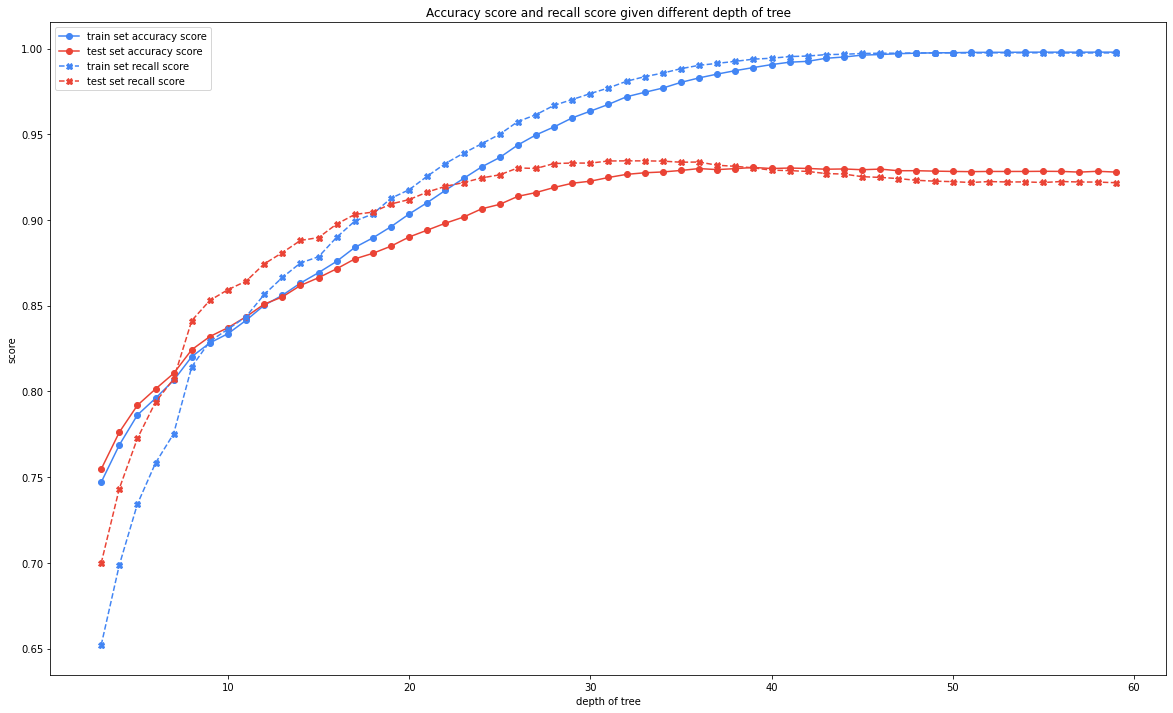

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.7546700407800357, 0.7762142106028093, 0.7919448742829297, 0.8014602159546547, 0.8105395446656807, 0.8243722695756995, 0.8320495173934974, 0.8372218280057109, 0.8435995862151511, 0.8509605109045987, 0.8551325564893262, 0.8618266378271165, 0.8663663021826296, 0.8715728098897999, 0.8773093725688003, 0.8805837444109123, 0.884764339269379, 0.8901076353563765, 0.8941001461925809, 0.8981439526712206, 0.9017175490942044, 0.9065222409356325, 0.9091383186998264, 0.9138062221614274, 0.9160204840598791, 0.9189785327736408, 0.9214407236105293, 0.9226461712077559, 0.9248005881900333, 0.9266301327702212, 0.9275534543340543, 0.9280407629371885, 0.9289042395848472, 0.9300070958972035, 0.9294086467354599, 0.9299643495285076, 0.9306568407013824, 0.9300498422658995, 0.9303148697518145

In [82]:
# How max_depth (The maximum depth of the tree) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

depths = [i for i in range(3, 60)]

for d in depths:
    model = RandomForestClassifier(max_depth=d)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(depths, train_accuracy_score, color='#4285f4', marker='o', label='train set accuracy score')
plt.plot(depths, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(depths, train_recall_score, color='#4285f4', marker='X', label='train set recall score', linestyle='--')
plt.plot(depths, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different depth of tree')
plt.xlabel('depth of tree')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(depths)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)


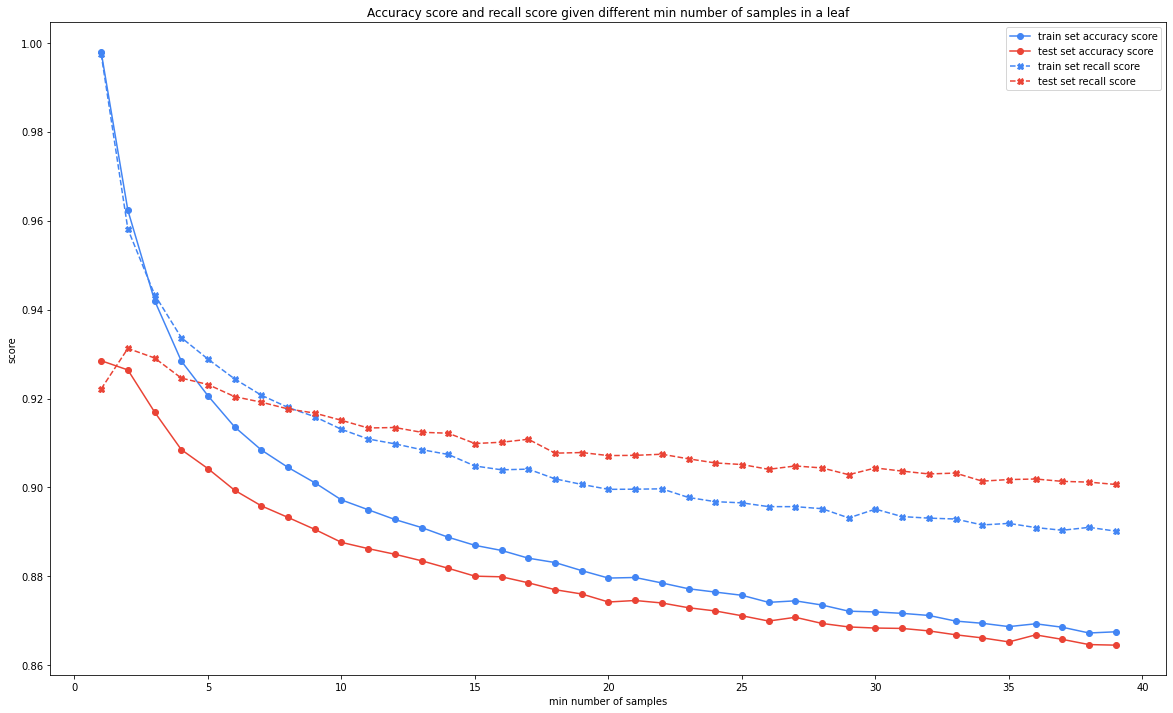

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0.9285024237191051, 0.9264249502004804, 0.9169609041711907, 0.908505672443126, 0.9042224862997889, 0.8993579495421864, 0.8958527473091161, 0.8932452188186614, 0.8905607468645539, 0.8876368952457488, 0.8862348143525207, 0.8849695218391198, 0.8834990467559781, 0.8818062905556173, 0.8800365908916038, 0.8798912532380374, 0.8785404679872445, 0.87699304944045, 0.8760269815079209, 0.8742230847489506, 0.8745650556985184, 0.8740093529054707, 0.872932144414332, 0.8722140054202395, 0.8711282476553617, 0.8699398986056135, 0.8707862767057939, 0.8694012943600441, 0.8686147611760381, 0.8683668322376014, 0.8682813395002095, 0.8677256367071617, 0.8668536107857637, 0.8661525703391497, 0.8652463473227949, 0.8668279629645461, 0.8658191486633211, 0.8646478981610513, 0.8645196590549633]
[0.9979149201946391, 0.9623213255218043, 0.9420452305580557, 0.928447090506

In [83]:
# How min_smaple_leaf (The minimum number of samples required to be at a leaf node) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

leaves = [i for i in range(1, 40)]

for l in leaves:
    model = RandomForestClassifier(min_samples_leaf=l)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(leaves, train_accuracy_score, color='#4285f4', marker='o', label='train set accuracy score')
plt.plot(leaves, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(leaves, train_recall_score, color='#4285f4', marker='X', label='train set recall score', linestyle='--')
plt.plot(leaves, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different min number of samples in a leaf')
plt.xlabel('min number of samples')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(leaves)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)

In [84]:
# train the model with params that fits the data well and without causing overfitting
rf_best = RandomForestClassifier(n_estimators=131, max_features='log2', max_depth=35, min_samples_leaf=2)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

In [85]:
acc_train = accuracy_score(y_train, rf_best.predict(X_train))
acc_train

0.9451870991030357

In [86]:
acc = accuracy_score(y_test, y_pred_best)
acc

0.9181150561259821

In [87]:
recall_train = recall_score(y_train, rf_best.predict(X_train))
recall_train

0.9490664728278274

In [88]:
recall = recall_score(y_test, y_pred_best)
recall

0.9324268995871575

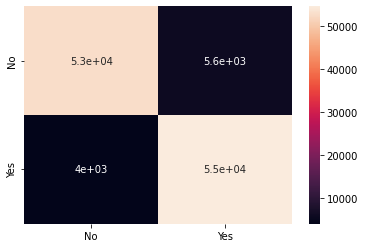

In [89]:
plot_conf_matrix(y_test, y_pred_best)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     58351
           1       0.91      0.93      0.92     58618

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



In [91]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_best, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist(), top=None)

Weight,Feature
0.0493 ± 0.0003,AgeCategory_80 or older
0.0395 ± 0.0005,BMI
0.0365 ± 0.0004,SleepTime
0.0357 ± 0.0003,PhysicalHealth
0.0319 ± 0.0005,MentalHealth
0.0300 ± 0.0005,Race_White
0.0263 ± 0.0004,AgeCategory_75-79
0.0250 ± 0.0003,AgeCategory_70-74
0.0232 ± 0.0004,GenHealth_Very good
0.0214 ± 0.0003,GenHealth_Excellent


In [92]:
rf_best = RandomForestClassifier(n_estimators=131, max_features=25, max_depth=27, min_samples_leaf=10)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)